In [ ]:
import pandas as pd
import numpy as np
import os
import nltk
import seaborn as sns
from matplotlib import pyplot as plt

In [100]:
os.chdir("/Users/mm06832/Documents/Classes/CS585/final_project/cornell_movie-dialogs_corpus")
df = pd.read_csv("processed_data_original.csv")
df =  df[df.columns[1:]]

In [105]:
df['sentence_1_tokenized'] = df['sentence_1'].astype(str).apply(lambda x: nltk.word_tokenize(x))
df['sentence_2_tokenized'] = df['sentence_2'].astype(str).apply(lambda x: nltk.word_tokenize(x))

Average history length (in sentences): 2.25
Median history length (in sentences): 1.0
Maximum history length (in sentences): 14


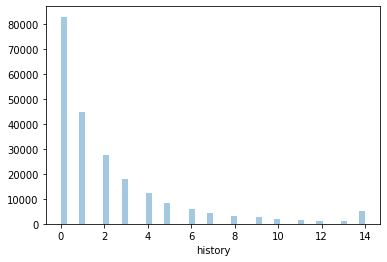

In [170]:
df['history'] = df['history'].apply(lambda x: eval(x))
lengths = df['history'].apply(lambda x: len(x))
print("Average history length (in sentences): {}".format(round(np.mean(lengths), 2)))
print("Median history length (in sentences): {}".format(np.median(lengths)))
print("Maximum history length (in sentences): {}".format(np.max(lengths)))
sns.distplot(lengths, kde = False)

In [149]:
tokenized_lines = df['sentence_1_tokenized'].append(df['sentence_2_tokenized'])
tokenized_lines = [list(x) for x in set(tuple(x) for x in tokenized_lines) if len(x) is not 0]

In [150]:
lengths = [len(x) for x in tokenized_lines]

Average sentence length (in tokens): 15.21
Median sentence length (in tokens): 11.0
Minimum sentence length (in tokens): 1
Maximum sentence length (in tokens): 684


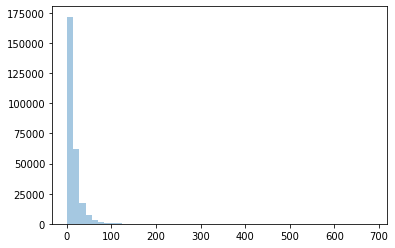

In [151]:
print("Average sentence length (in tokens): {}".format(round(np.mean(lengths), 2)))
print("Median sentence length (in tokens): {}".format(np.median(lengths)))
print("Minimum sentence length (in tokens): {}".format(np.min(lengths)))
print("Maximum sentence length (in tokens): {}".format(np.max(lengths)))
sns.distplot(lengths, kde = False)

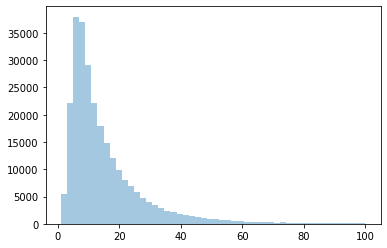

In [152]:
sns.distplot([l for l in lengths if l <= 100], kde = False)

In [ ]:
print("Number of sentence pairs: {}".format(len(df)))
print("Number of unique conversations: {}".format(np.max(df['index'])))

lines_text = df['sentence_1'].append(df['sentence_2']).unique()
lines_id = df['sentence_1_id'].append(df['sentence_2_id']).unique()
print("Number of unique lines (by id): {}".format(len(lines_id)))
print("Number of unique lines (by text): {}".format(len(lines_text)))
print("Number of unique lines (by text, after tokenization and processing): {}".format(len(lengths)))

Number of unique speakers: 9035
Average lines per speaker: 40.89
Median lines per speaker: 16.0
Minimum lines per speaker: 5
Maximum lines per speaker: 800


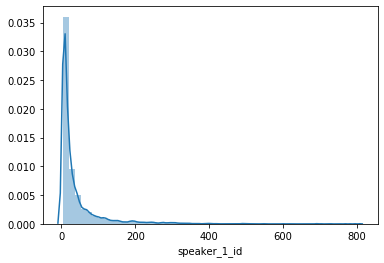

In [205]:
characters = df['speaker_1_id'].append(df['speaker_2_id']).unique()
print("Number of unique speakers: {}".format(len(characters)))
#num lines per speaker
lines_per_speaker = df.groupby('speaker_1_id').agg({'speaker_1_id' : 'count'})['speaker_1_id']
print("Average lines per speaker: {}".format(round(np.mean(lines_per_speaker), 2)))
print("Median lines per speaker: {}".format(np.median(lines_per_speaker)))
print("Minimum lines per speaker: {}".format(np.min(lines_per_speaker)))
print("Maximum lines per speaker: {}".format(np.max(lines_per_speaker)))
sns.distplot(lines_per_speaker)

Number of unique movies: 617
Average lines per movie: 359.18
Median lines per movie: 333.0
Minimum lines per movie: 5
Maximum lines per movie: 1192


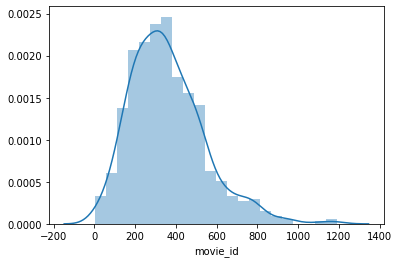

In [163]:
movies = df['movie_id'].unique()
print("Number of unique movies: {}".format(len(movies)))
#num lines per movie 
lines_per_movie = df.groupby('movie_id').agg({'movie_id' : 'count'})['movie_id']
print("Average lines per movie: {}".format(round(np.mean(lines_per_movie), 2)))
print("Median lines per movie: {}".format(np.median(lines_per_movie)))
print("Minimum lines per movie: {}".format(np.min(lines_per_movie)))
print("Maximum lines per movie: {}".format(np.max(lines_per_movie)))
sns.distplot(lines_per_movie)

In [167]:
tokenized_lines

[['I',
  'guess',
  'that',
  'passes',
  'for',
  'manners',
  'in',
  'your',
  'cracker',
  'view',
  'of',
  'things',
  '.'],
 ['<', 'u', '>', 'Why', 'you', '<', '/u', '>', '?'],
 ['Yeah', ',', 'I', 'guess', 'it', "'s", 'all', 'right', '.'],
 ['We', "'ve", 'got', 'to', 'get', 'you', 'out', 'of', 'here', '.'],
 ['That',
  "'s",
  'the',
  'key',
  'to',
  'the',
  'city',
  'of',
  'Pasadena',
  ',',
  'which',
  'Mr.',
  'Lebowski',
  'was',
  'given',
  'two',
  'years',
  'ago',
  'in',
  'recognition',
  'of',
  'his',
  'various',
  'civic',
  ',',
  'uh',
  '.'],
 ['Champagne', '?'],
 ["D'you",
  'know',
  'something',
  ',',
  '``',
  'They',
  "''",
  'do',
  "n't",
  'worry',
  'me',
  'at',
  'all',
  '.',
  'Anyroad',
  ',',
  'I',
  'only',
  'fancy',
  'listening',
  'to',
  'you',
  '...',
  'that',
  "'s",
  'all',
  'but',
  'if',
  'it',
  'worries',
  'you',
  '...',
  'well',
  '...'],
 ['My', 'husband', 'will', 'be', 'back', 'quite', 'late', '.'],
 ['Maybe', 'I'

In [175]:
movies = pd.read_csv("movie_titles_metadata.txt", sep="\+\+\+\$\+\+\+", header=None)
movies.columns = ['movie_id', 'movie_name', 'movie_year', 'movie_avg_rating', 'movie_num_ratings', 'genre']
for col in movies.columns[:3]:
    movies[col] = movies[col].astype(str).apply(lambda x: x.strip())
movies

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movie_id,movie_name,movie_year,movie_avg_rating,movie_num_ratings,genre
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thril..."
...,...,...,...,...,...,...
612,m612,watchmen,2009,7.8,135229,"['action', 'crime', 'fantasy', 'mystery', 'sc..."
613,m613,xxx,2002,5.6,53505,"['action', 'adventure', 'crime']"
614,m614,x-men,2000,7.4,122149,"['action', 'sci-fi']"
615,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']"


In [203]:
characters = pd.read_csv("movie_characters_metadata.txt", sep="\+\+\+\$\+\+\+", header=None)
characters.columns = ['speaker_id', 'speaker_name', 'movie_id', 'movie_name', 'speaker_gender', 'credits_position']
for col in characters.columns[:3]:
    characters[col] = characters[col].astype(str).apply(lambda x: x.strip())
characters_subset = characters[['speaker_id', 'speaker_gender', 'credits_position']]
characters

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,speaker_id,speaker_name,movie_id,movie_name,speaker_gender,credits_position
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6
...,...,...,...,...,...,...
9030,u9030,DURNFORD,m616,zulu dawn,?,?
9031,u9031,MELVILL,m616,zulu dawn,?,?
9032,u9032,NORRIS-NEWMAN,m616,zulu dawn,?,?
9033,u9033,STUART SMITH,m616,zulu dawn,?,?


In [187]:
df = pd.merge(df, 
                  movies,
                  how = "left",
                  on = "movie_id")
test

,index,sentence_1,sentence_1_id,sentence_2,sentence_2_id,speaker_1,speaker_1_id,speaker_2,speaker_2_id,movie_id,history,sentence_1_tokenized,sentence_2_tokenized,speaker_1_gender,speaker_1_credits_position,speaker_2_gender,speaker_2_credits_position
0,0,Can we make this quick? Roxanne Korrine and A...,L194,"Well, I thought we'd start with pronunciation,...",L195,BIANCA,u0,CAMERON,u2,m0,[],"[Can, we, make, this, quick, ?, Roxanne, Korri...","[Well, ,, I, thought, we, 'd, start, with, pro...",f,4,m,3
1,0,"Well, I thought we'd start with pronunciation,...",L195,Not the hacking and gagging and spitting part....,L196,BIANCA,u0,CAMERON,u2,m0,[Can we make this quick? Roxanne Korrine and ...,"[Well, ,, I, thought, we, 'd, start, with, pro...","[Not, the, hacking, and, gagging, and, spittin...",f,4,m,3
2,0,Not the hacking and gagging and spitting part....,L196,Okay... then how 'bout we try out some French ...,L197,BIANCA,u0,CAMERON,u2,m0,[Can we make this quick? Roxanne Korrine and ...,"[Not, the, hacking, and, gagging, and, spittin...","[Okay, ..., then, how, 'bout, we, try, out, so...",f,4,m,3
3,1,You're asking me out. That's so cute. What's ...,L198,Forget it.,L199,BIANCA,u0,CAMERON,u2,m0,[],"[You, 're, asking, me, out, ., That, 's, so, c...","[Forget, it, .]",f,4,m,3
4,2,"No, no, it's my fault -- we didn't have a prop...",L200,Cameron.,L201,BIANCA,u0,CAMERON,u2,m0,[],"[No, ,, no, ,, it, 's, my, fault, --, we, did,...","[Cameron, .]",f,4,m,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,83095,"Your orders, Mr Vereker?",L666369,I'm to take the Sikali with the main column to...,L666370,DURNFORD,u9030,VEREKER,u9034,m616,[],"[Your, orders, ,, Mr, Vereker, ?]","[I, 'm, to, take, the, Sikali, with, the, main...",?,?,?,?
221612,83095,I'm to take the Sikali with the main column to...,L666370,Lord Chelmsford seems to want me to stay back ...,L666371,DURNFORD,u9030,VEREKER,u9034,m616,"[Your orders, Mr Vereker?]","[I, 'm, to, take, the, Sikali, with, the, main...","[Lord, Chelmsford, seems, to, want, me, to, st...",?,?,?,?
221613,83095,Lord Chelmsford seems to want me to stay back ...,L666371,I think Chelmsford wants a good man on the bor...,L666372,DURNFORD,u9030,VEREKER,u9034,m616,"[Your orders, Mr Vereker?, I'm to take the Sik...","[Lord, Chelmsford, seems, to, want, me, to, st...","[I, think, Chelmsford, wants, a, good, man, on...",?,?,?,?
221614,83096,"Well I assure you, Sir, I have no desire to cr...",L666520,"And I assure you, you do not In fact I'd be ob...",L666521,DURNFORD,u9030,VEREKER,u9034,m616,[],"[Well, I, assure, you, ,, Sir, ,, I, have, no,...","[And, I, assure, you, ,, you, do, not, In, fac...",?,?,?,?


In [188]:
df = pd.merge(pd.merge(df, 
                  characters_subset,
                  how = "left",
                  left_on = "speaker_1_id",
               right_on = "speaker_id"),
                characters_subset, 
                how = "left",
                left_on = "speaker_2_id",
               right_on = "speaker_id")
df = df.rename(columns={"speaker_gender_x": "speaker_1_gender", "credits_position_x": "speaker_1_credits_position", "speaker_gender_y" : "speaker_2_gender", "credits_position_y" : "speaker_2_credits_position"})
df = df.drop(['speaker_id_x', 'speaker_id_y'], axis=1)
df

,index,sentence_1,sentence_1_id,sentence_2,sentence_2_id,speaker_1,speaker_1_id,speaker_2,speaker_2_id,movie_id,...,sentence_2_tokenized,movie_name,movie_year,movie_avg_rating,movie_num_ratings,genre,speaker_1_gender,speaker_1_credits_position,speaker_2_gender,speaker_2_credits_position
0,0,Can we make this quick? Roxanne Korrine and A...,L194,"Well, I thought we'd start with pronunciation,...",L195,BIANCA,u0,CAMERON,u2,m0,...,"[Well, ,, I, thought, we, 'd, start, with, pro...",10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",f,4,m,3
1,0,"Well, I thought we'd start with pronunciation,...",L195,Not the hacking and gagging and spitting part....,L196,BIANCA,u0,CAMERON,u2,m0,...,"[Not, the, hacking, and, gagging, and, spittin...",10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",f,4,m,3
2,0,Not the hacking and gagging and spitting part....,L196,Okay... then how 'bout we try out some French ...,L197,BIANCA,u0,CAMERON,u2,m0,...,"[Okay, ..., then, how, 'bout, we, try, out, so...",10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",f,4,m,3
3,1,You're asking me out. That's so cute. What's ...,L198,Forget it.,L199,BIANCA,u0,CAMERON,u2,m0,...,"[Forget, it, .]",10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",f,4,m,3
4,2,"No, no, it's my fault -- we didn't have a prop...",L200,Cameron.,L201,BIANCA,u0,CAMERON,u2,m0,...,"[Cameron, .]",10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",f,4,m,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221611,83095,"Your orders, Mr Vereker?",L666369,I'm to take the Sikali with the main column to...,L666370,DURNFORD,u9030,VEREKER,u9034,m616,...,"[I, 'm, to, take, the, Sikali, with, the, main...",zulu dawn,1979,6.4,1911,"['action', 'adventure', 'drama', 'history', '...",?,?,?,?
221612,83095,I'm to take the Sikali with the main column to...,L666370,Lord Chelmsford seems to want me to stay back ...,L666371,DURNFORD,u9030,VEREKER,u9034,m616,...,"[Lord, Chelmsford, seems, to, want, me, to, st...",zulu dawn,1979,6.4,1911,"['action', 'adventure', 'drama', 'history', '...",?,?,?,?
221613,83095,Lord Chelmsford seems to want me to stay back ...,L666371,I think Chelmsford wants a good man on the bor...,L666372,DURNFORD,u9030,VEREKER,u9034,m616,...,"[I, think, Chelmsford, wants, a, good, man, on...",zulu dawn,1979,6.4,1911,"['action', 'adventure', 'drama', 'history', '...",?,?,?,?
221614,83096,"Well I assure you, Sir, I have no desire to cr...",L666520,"And I assure you, you do not In fact I'd be ob...",L666521,DURNFORD,u9030,VEREKER,u9034,m616,...,"[And, I, assure, you, ,, you, do, not, In, fac...",zulu dawn,1979,6.4,1911,"['action', 'adventure', 'drama', 'history', '...",?,?,?,?


In [194]:
#one hot encode columns for TMX summary reasons
def one_hot_encode_genres(df, genre):
    func = lambda x: 0 if pd.isnull(x['genre']) else int(genre in x['genre'])
    df[genre] = df.apply(func, axis = 1)
    
genres = ["comedy", "sport", "biography", "romance", "action", "adventure", "drama", "history", "sci-fi", "family", "fantasy", "musical", "crime", "thriller", "short", "western", "documentary", "horror", "animation", "film-noir", "music", "war"]

for genre in genres:
    one_hot_encode_genres(df, genre)

In [202]:
print("There are {} genres in the dataset.".format(len(genres)))

d = dict.fromkeys(genres, ['mean'])

(df
 .agg(d)
)

There are 22 genres in the dataset.


,comedy,sport,biography,romance,action,adventure,drama,history,sci-fi,family,...,crime,thriller,short,western,documentary,horror,animation,film-noir,music,war
mean,0.309183,0.015139,0.046572,0.258826,0.208212,0.134377,0.577603,0.025152,0.13911,0.019854,...,0.248006,0.398685,0.004702,0.019926,0.004418,0.116341,0.018789,0.006985,0.034627,0.03192
